In [1]:
from pycello2.ucf import UCF
import json
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("Eco1C1G1T1.UCF.json") as ucf_file:
    ucf = json.load(ucf_file)
    ucf = UCF(ucf)

In [3]:
func = {}
for gate in ucf.gates:
    x = sympy.symbols(' '.join(gate.variables))
    p = sympy.symbols(' '.join(gate.parameters.keys()))
    subs = ((param, gate.parameters[param.name]) for param in p)
    expr = sympy.simplify(gate.equation).subs(subs)
    f = sympy.lambdify(x, expr, 'numpy')
    func[gate] = f

In [4]:
x = np.logspace(-3,2)

In [5]:
tt = {}
for i in range(len(ucf.gates)):
    pairs = []
    for j in range(len(ucf.gates)):
        for k in range(j, len(ucf.gates)):
            if (ucf.gates[i].group == ucf.gates[j].group or ucf.gates[j].group == ucf.gates[k].group or ucf.gates[k].group == ucf.gates[i].group):
                continue
            table = {
                '00': func[ucf.gates[i]](ucf.gates[j].parameters['ymin'] + ucf.gates[k].parameters['ymin']),
                '01': func[ucf.gates[i]](ucf.gates[j].parameters['ymin'] + ucf.gates[k].parameters['ymax']),
                '10': func[ucf.gates[i]](ucf.gates[j].parameters['ymax'] + ucf.gates[k].parameters['ymin']),
                '11': func[ucf.gates[i]](ucf.gates[j].parameters['ymax'] + ucf.gates[k].parameters['ymax'])
            }
            tt[(ucf.gates[i].name, ucf.gates[j].name, ucf.gates[k].name)] = table

In [6]:
nand = []
nor = []
for key in tt.keys():
    nand.append(min(tt[key]['00'],tt[key]['01'],tt[key]['10'])/tt[key]['11'])
    nor.append(tt[key]['00']/max(tt[key]['01'],tt[key]['10'],tt[key]['11']))

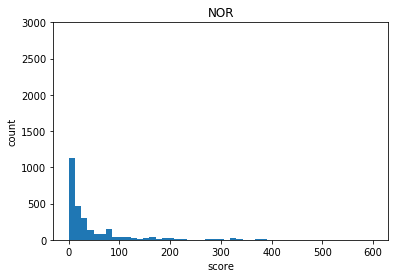

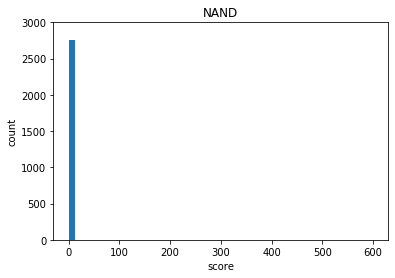

In [8]:
plt.subplots()
bins = np.linspace(0,600)
plt.hist(nor, bins=bins)
plt.ylim(0,3000)
plt.xlabel("score")
plt.ylabel("count")
plt.title("NOR")
plt.subplots()
plt.hist(nand, bins=bins)
plt.ylim(0,3000)
plt.xlabel("score")
plt.ylabel("count")
plt.title("NAND");